# Exploratory Analysis of TMDb Movies Dataset

This notebook provides a complete overview of the TMDb movies dataset, including structure assessment, data quality checks, rating distributions, genre analysis, and key statistics.

**Dataset Source:** [`tmdb_movies.csv`](../tmdb_movies.csv)

**Last Updated:** August 11, 2025

**Objectives:**
- Examine dataset structure and basic info
- Assess data quality and handle missing values
- Analyze rating distributions and statistics
- Explore genre frequencies and rankings
- Identify top-rated movies and summaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os, sys
sys.path.insert(0, os.getcwd()+"/..")
import importlib
import tmdb_scraper
importlib.reload(tmdb_scraper)
from IPython.display import Image, Markdown, display

# Set visualization stylesstyles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load the Dataset

In [2]:
df = pd.read_csv('../tmdb_movies.csv')
df.head()

,Title,Year,Rating,Description,Genre
0,War of the Worlds,2025.0,4.375,Will Radford is a top analyst for Homeland Sec...,"Science Fiction, Thriller"
1,Jurassic World Rebirth,2025.0,6.411,Five years after the events of Jurassic World ...,"Science Fiction, Adventure, Action"
2,Tuhog,2023.0,4.400,Abie mourns after the death of Michael. She fi...,"Drama, Romance"
3,The Pickup,2025.0,6.640,A routine cash pickup takes a wild turn when m...,"Action, Comedy, Crime"
4,Creation of the Gods II: Demon Force,2025.0,6.282,Taishi Wen Zhong led the army of Shang Dynasty...,"Action, Fantasy, War"


## Dataset Structure and Data Quality Assessment

In [3]:
# Basic info
df.info()

# Shape
print(f'Dataset shape: {df.shape}')

# Sample data
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        9999 non-null   object 
 1   Year         9972 non-null   float64
 2   Rating       9999 non-null   float64
 3   Description  9889 non-null   object 
 4   Genre        9870 non-null   object 
dtypes: float64(2), object(3)
memory usage: 390.7+ KB
Dataset shape: (9999, 5)


,Title,Year,Rating,Description,Genre
49,Ne Zha,2019.0,7.917,A young boy is born as the reincarnation of a ...,"Animation, Fantasy, Adventure"
8866,Blink,2024.0,8.100,The Pelletier family sets out on an epic journ...,Documentary
8003,Heartbreakers,2001.0,6.101,Max and Page are a brilliant mother/daughter c...,"Comedy, Romance, Crime"
3145,Citizen Kane,1941.0,7.998,Newspaper magnate Charles Foster Kane is taken...,"Mystery, Drama"
5388,Extinction,2018.0,6.033,"A chief mechanic at a factory, haunted by apoc...","Action, Drama, Science Fiction, Thriller"


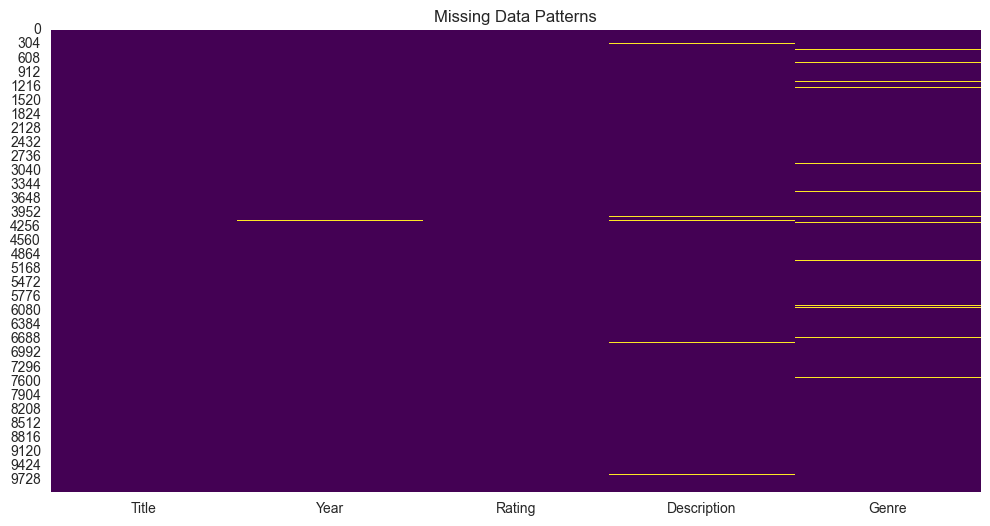

In [4]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
missing_df[missing_df['Missing'] > 0]

# Visualize missing patterns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns')
plt.show()

### Data Cleaning Insights

Based on the missing values:
- If Year is missing, we might drop or impute.
- Descriptions and Genres might need filling with 'Unknown'.
- For now, we'll proceed with analysis, noting any impacts.

In [5]:
# Basic cleaning example
df['Genre'] = df['Genre'].fillna('Unknown')
df['Description'] = df['Description'].fillna('No description available')
# Drop rows with missing critical fields if needed
# df = df.dropna(subset=['Title', 'Year', 'Rating'])

## Rating Distribution Analysis and Statistics

In [6]:
# Statistical summary
df['Rating'].describe()

count    9999.000000
mean        6.336886
std         1.439354
min         0.000000
25%         5.900000
50%         6.546000
75%         7.167500
max        10.000000
Name: Rating, dtype: float64

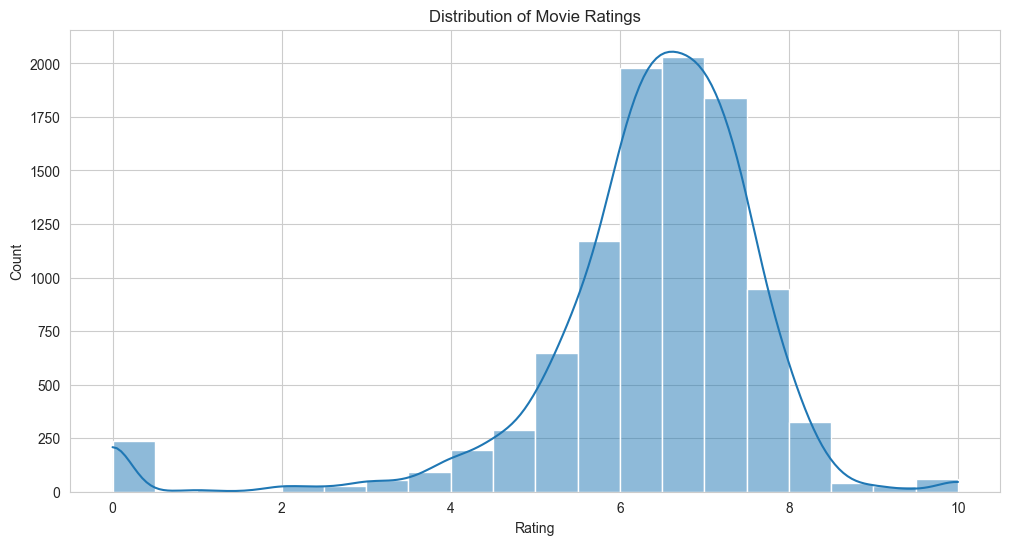

In [7]:
# Distribution plot
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Genre Frequency and Popularity Rankings

In [8]:
# Split comma-separated genres
genres = df['Genre'].str.split(',', expand=True).stack().str.strip().value_counts()
genres = genres.reset_index()
genres.columns = ['Genre', 'Count']

# Top 10 genres
genres.head(10)

,Genre,Count
0,Drama,4115
1,Comedy,2821
2,Action,2720
3,Thriller,2582
4,Adventure,1771
5,Romance,1762
6,Horror,1472
7,Crime,1401
8,Science Fiction,1225
9,Fantasy,1203


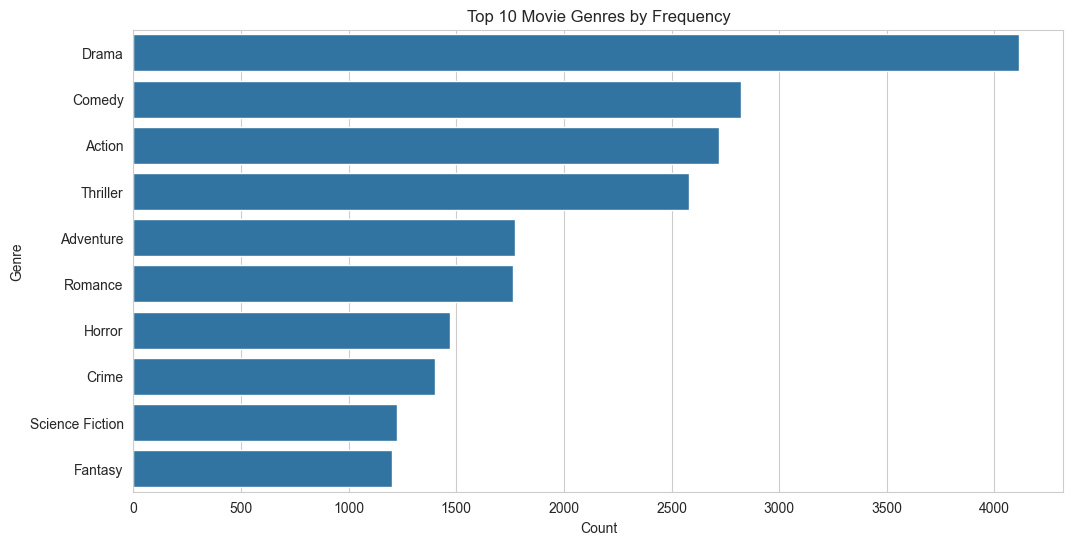

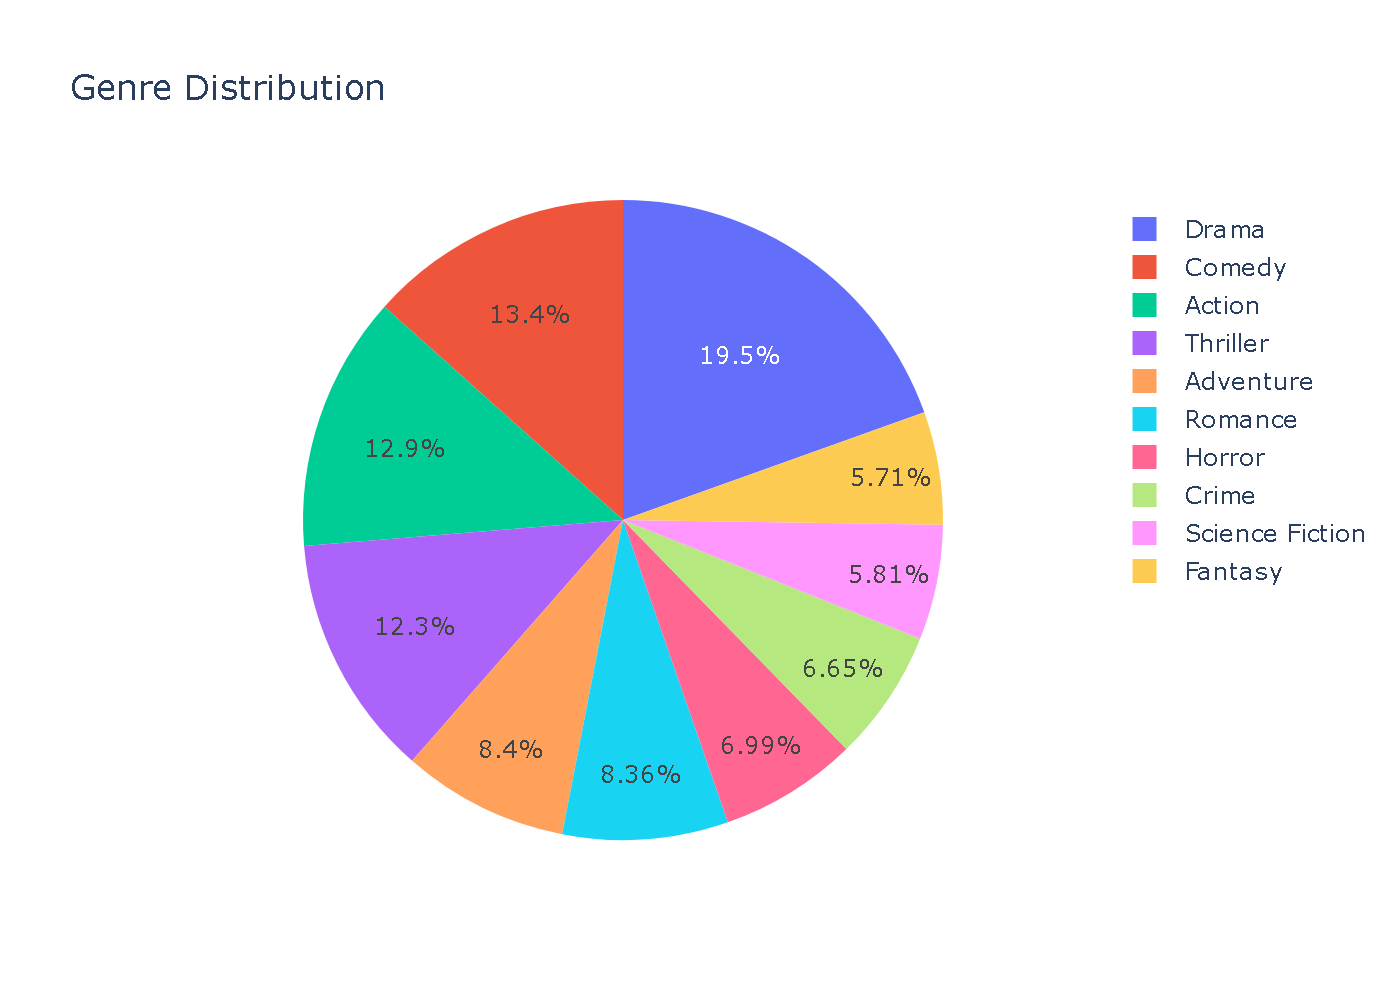

In [ ]:
# Bar plot
sns.barplot(data=genres.head(10), x='Count', y='Genre')
plt.title('Top 10 Movie Genres by Frequency')
plt.show()

# Pie chart
fig = px.pie(genres.head(10), values='Count', names='Genre', title='Genre Distribution')
img_bytes = fig.to_image(format="png", scale=2)   # scale for higher-res
display(Image(data=img_bytes))

## Top-Rated Movies and Statistical Summaries

In [10]:
# Top 10 rated movies
top_rated = df.sort_values('Rating', ascending=False).head(10)[['Title', 'Year', 'Rating', 'Genre']]
top_rated

,Title,Year,Rating,Genre
2576,F-Buddies,2024.0,10.0,Drama
1170,新婚シリーズ 最初が肝心,1962.0,10.0,Unknown
464,Elena,2017.0,10.0,Drama
30,Forbidden Immoral Sex 3: Too Young Stepmother,2018.0,10.0,Drama
2121,裏垢男子とAV男優どっちがエロい？素顔の美谷朱音を２人きりの空間でイカせまくる本気の生々ハメ...,2025.0,10.0,Documentary
5419,Fudoh 2: Nohma Strikes Back!,1997.0,10.0,Action
1992,A record of a simple big-breasted college girl...,2023.0,10.0,Drama
8880,10年ぶりに再会した初恋の幼馴染が風俗で働いていた。 設楽ゆうひ CAWD-584,2023.0,10.0,Unknown
89,Night,2024.0,10.0,Animation
536,Amazing Berendeev,1976.0,10.0,Family


In [11]:
# Overall statistical summary
df.describe(include='all')

,Title,Year,Rating,Description,Genre
count,9999,9972.000000,9999.000000,9999,9999
unique,9544,NaN,NaN,9771,2190
top,Godzilla,NaN,NaN,No description available,Drama
freq,4,NaN,NaN,110,603
mean,NaN,2005.363317,6.336886,NaN,NaN
std,NaN,19.911379,1.439354,NaN,NaN
min,NaN,1902.000000,0.000000,NaN,NaN
25%,NaN,1998.000000,5.900000,NaN,NaN
50%,NaN,2011.000000,6.546000,NaN,NaN
75%,NaN,2020.000000,7.167500,NaN,NaN


In [12]:
target_movies = tmdb_scraper.target_movies

summary_md = f"""
## **Key Takeaways**
- The dataset has {df.shape[0]} movies with average rating of {df['Rating'].mean():.2f}.
- Most common genre is {genres.iloc[0]['Genre']}.
- Data quality is generally good, with minimal missing values in {missing_df[missing_df['Missing'] > 0].index.tolist()}.
"""

display(Markdown(summary_md))

if len(df) < target_movies:
    display(Markdown(f"#### ⚠️ **NOTE: {target_movies - len(df)} movie(s) skipped due to API limits.**\n"))


## **Key Takeaways**
- The dataset has 9999 movies with average rating of 6.34.
- Most common genre is Drama.
- Data quality is generally good, with minimal missing values in ['Year', 'Description', 'Genre'].


#### ⚠️ **NOTE: 1 movie(s) skipped due to API limits.**



---

<div align="center">
    <p>
        <a href="https://raw.githubusercontent.com/HERALDEXX/tmdb-movie-scraper/refs/heads/main/LICENSE" target="_blank">
            <img src="https://img.shields.io/badge/License-MIT-yellow.svg?style=flat-square" alt="Click to View MIT License" style="vertical-align: middle;" />
        </a> <strong style="font-weight: bold;">• © 2025 Herald Inyang •</strong> 
        <a href="https://github.com/HERALDEXX" target="_blank">
            <img src="https://img.shields.io/badge/GitHub-HERALDEXX-000?style=flat-square&logo=github" alt="GitHub Badge" style="vertical-align: middle;" />
        </a>
    </p>
</div>

---
